In [15]:
reload_toocan = False # part of code that takes long time

<span style="color:pink">## choose subregion</span>

In [16]:
lon_min_subregion = 130
lon_max_subregion = 165
lat_min_subregion = 0
lat_max_subregion = 20

<span style="color:pink">## choose attribute (listed in code below in toocan[0])</span>

In [17]:
attribute = "duration"

<span style="color:pink">## choose MCS index and attribute (when plotting a single MCS, which MCS do you want to look at? Which attribute?). attributes listed in code blow in under toocan[36].clusters</span>

In [18]:
MCS_idx = 0
attribute_single_MCS = "surfkm2_132Wm2"

<span style="color:pink">## choose single timestep index for prec</span>

In [19]:
prec_idx = 5

<span style="color:pink">## choose extreme percentile</span>

In [20]:
percentile = 99.999

<span style="color:pink">##</span>

# Imports

In [21]:
%reload_ext autoreload
%matplotlib inline

In [22]:
%autoreload 2

import sys,os,glob
import psutil

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import pandas as pd
from pprint import pprint
import datetime as dt


from matplotlib.colors import LogNorm
from matplotlib.gridspec import GridSpec
import cartopy.crs as ccrs

import datetime as dt
import re
import gc
import matplotlib.animation as animation
import warnings
import pickle
from scipy.interpolate import interp1d


#-- Own settings

sys.path.append('/home/gmaxemin/code/stage-2023-rain-extremes-timing-intensity/scripts/start')


from my_functions import *
from load_TOOCAN_DYAMOND_modif_BF import load_TOOCAN_DYAMOND

# Paths

In [23]:
# path = '/home/gmaxemin/windows/internship_g_maxemin/DYAMOND_REGIONS'
toocan_path = "/data/fiolleau/DYAMOND/TOOCAN/TOOCAN_v2.07/GLOBAL/2016/FileTracking"
# filename = 'TOOCAN-GLOBAL-20160801-20160831.dat.gz'
toocan_filename = 'TOOCAN-GLOBAL-20160801-20160831.dat.gz'

In [24]:
#-- Paths

# DIR_DYAMOND (where DYAMOND data are)

path_DYAMOND_REGIONS = '/data/bfildier/DYAMOND_REGIONS/'
path_reg1_SAM = os.path.join(path_DYAMOND_REGIONS, "130E_165E_0N_20N/SAM")
path_2D = os.path.join(path_reg1_SAM,'2D')

DIR_DYAMOND = path_2D
print(DIR_DYAMOND)

# DIR_DATA (where segmentation relation table is)

DIR_DATA = "/home/gmaxemin/code/stage-2023-rain-extremes-timing-intensity/input/"

/data/bfildier/DYAMOND_REGIONS/130E_165E_0N_20N/SAM/2D


In [25]:
# Load relation table DYAMOND-TOOCAN
filename_table = 'relation_2_table_UTC_dyamond_segmentation.csv'
# load
df = pd.read_csv(os.path.join('/home/gmaxemin/code/stage-2023-rain-extremes-timing-intensity/scripts',filename_table))
# sort
df.sort_values(by='UTC',ignore_index=True,inplace=True)
# show
df

,Unnamed: 0,Unnamed: 0.4,Unnamed: 0.3,Unnamed: 0.2,img_seg_path,str_code,Unnamed: 0.1,Unnamed: 0.1.1,year,month,day,hour,minute,path_dyamond,UTC
0,476,476.0,476.0,476.0,data/fiolleau/DYAMOND/TOOCAN/TOOCAN_v2.07/GLOB...,2016-8-1-1-30,2.0,2.0,2016.0,8.0,1.0,1.0,30.0,DYAMOND_9216x4608x74_7.5s_4km_4608_0000000720,17014.03
1,443,443.0,443.0,443.0,data/fiolleau/DYAMOND/TOOCAN/TOOCAN_v2.07/GLOB...,2016-8-1-2-0,3.0,3.0,2016.0,8.0,1.0,2.0,0.0,DYAMOND_9216x4608x74_7.5s_4km_4608_0000000960,17014.04
2,468,468.0,468.0,468.0,data/fiolleau/DYAMOND/TOOCAN/TOOCAN_v2.07/GLOB...,2016-8-1-2-30,4.0,4.0,2016.0,8.0,1.0,2.0,30.0,DYAMOND_9216x4608x74_7.5s_4km_4608_0000001200,17014.05
3,432,432.0,432.0,432.0,data/fiolleau/DYAMOND/TOOCAN/TOOCAN_v2.07/GLOB...,2016-8-1-3-0,5.0,5.0,2016.0,8.0,1.0,3.0,0.0,DYAMOND_9216x4608x74_7.5s_4km_4608_0000001440,17014.06
4,437,437.0,437.0,437.0,data/fiolleau/DYAMOND/TOOCAN/TOOCAN_v2.07/GLOB...,2016-8-1-3-30,6.0,6.0,2016.0,8.0,1.0,3.0,30.0,DYAMOND_9216x4608x74_7.5s_4km_4608_0000001680,17014.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1914,1295,1295.0,1295.0,1295.0,data/fiolleau/DYAMOND/TOOCAN/TOOCAN_v2.07/GLOB...,2016-9-9-22-30,1916.0,1916.0,2016.0,9.0,9.0,22.0,30.0,DYAMOND_9216x4608x74_7.5s_4km_4608_0000460080,17053.45
1915,1315,1315.0,1315.0,1315.0,data/fiolleau/DYAMOND/TOOCAN/TOOCAN_v2.07/GLOB...,2016-9-9-23-0,1917.0,1917.0,2016.0,9.0,9.0,23.0,0.0,DYAMOND_9216x4608x74_7.5s_4km_4608_0000460320,17053.46
1916,1313,1313.0,1313.0,1313.0,data/fiolleau/DYAMOND/TOOCAN/TOOCAN_v2.07/GLOB...,2016-9-9-23-30,1918.0,1918.0,2016.0,9.0,9.0,23.0,30.0,DYAMOND_9216x4608x74_7.5s_4km_4608_0000460560,17053.47
1917,1304,1304.0,1304.0,1304.0,data/fiolleau/DYAMOND/TOOCAN/TOOCAN_v2.07/GLOB...,2016-9-10-0-0,1919.0,1919.0,2016.0,9.0,10.0,0.0,0.0,DYAMOND_9216x4608x74_7.5s_4km_4608_0000460800,17053.48


# Load Toocan Data

In [26]:
if reload_toocan == True:
    toocan = load_TOOCAN_DYAMOND(os.path.join(toocan_path,toocan_filename))

In [27]:
# toocan is a list. to access an object:
toocan[0]

< MCS_IntParameters object:
 . label: 1
 . qc_MCS: 11100
 . duration: 12.5
 . classif: 2
 . Tmax: 0.0
 . Utime_Init: 17014.18
 . lonInit: 115.04
 . latInit: 20.71
 . Utime_End: 17014.42
 . lonEnd: 116.37
 . latEnd: 21.88
 . lonmin: 114.93
 . latmin: 20.71
 . lonmax: 116.37
 . latmax: 21.89
 . vavg: 4.2
 . dist: 189.2
 . olrmin: 188.0
 . surfmaxPix_172Wm2: 0
 . surfmaxkm2_172Wm2: 32864.0
 . surfmaxkm2_132Wm2: 32592.0
 . surfmaxkm2_110Wm2: 32320.0
 . surfmaxkm2_90Wm2: 31520.0
 . surfcumkm2_172Wm2: 354480.0
 . surfcumkm2_132Wm2: 0
 . surfcumkm2_110Wm2: 0
 . surfcumkm2_90Wm2: 0
 . precip_total: 0
 . precip_max: 0
 . maxSurf00mmh_km2: 0
 . maxSurf02mmh_km2: 0
 . maxSurf05mmh_km2: 0
 . maxSurf10mmh_km2: 0
 . classif_JIRAK: 0.0
 . localtime_Init: 17014.6737
 . localtime_End: 17015.1774
 . clusters: <class 'load_TOOCAN_DYAMOND_modif_BF.MCS_Lifecycle'>
 >

In [28]:
# to access an attribute over time:
toocan[36].clusters.surfkm2_132Wm2

[0.0,
 0.0,
 1168.0,
 2768.0,
 4960.0,
 6624.0,
 8288.0,
 9072.0,
 8480.0,
 6688.0,
 5072.0,
 2960.0,
 1120.0,
 208.0,
 96.0]

In [29]:
toocan[36].clusters

< MCS_Lifecycle object:
 . qc_im: <class 'list'>
 . olrmin: <class 'list'>
 . olravg_172Wm2: <class 'list'>
 . olravg_110Wm2: <class 'list'>
 . olravg_90Wm2: <class 'list'>
 . olr_90th: <class 'list'>
 . surfPix_172Wm2: <class 'list'>
 . surfPix_110Wm2: <class 'list'>
 . surfKm2: []
 . Utime: <class 'list'>
 . Localtime: <class 'list'>
 . lon: <class 'list'>
 . lat: <class 'list'>
 . x: <class 'list'>
 . y: <class 'list'>
 . velocity: <class 'list'>
 . semiminor_132Wm2: <class 'list'>
 . semimajor_132Wm2: <class 'list'>
 . orientation_132Wm2: <class 'list'>
 . excentricity_132Wm2: <class 'list'>
 . semiminor_172Wm2: <class 'list'>
 . semimajor_172Wm2: <class 'list'>
 . orientation_172Wm2: <class 'list'>
 . excentricity_172Wm2: <class 'list'>
 . surfkm2_172Wm2: <class 'list'>
 . surfkm2_132Wm2: <class 'list'>
 . surfkm2_110Wm2: <class 'list'>
 . surfkm2_90Wm2: <class 'list'>
 >

In [30]:
#- redefining toocan for subregion

filtered_toocan = []

for obj in toocan:
    # Check if the object is within the desired region
    if (
        obj.lonmin <= lon_max_subregion
        and obj.lonmax >= lon_min_subregion
        and obj.latmin <= lat_max_subregion
        and obj.latmax >= lat_min_subregion
    ):
        # Check and modify lonmin
        if obj.lonmin < lon_min_subregion:
            obj.lonmin = lon_min_subregion
        if obj.lonmin > lon_max_subregion:
            obj.lonmin = lon_max_subregion

        # Check and modify lonmax
        if obj.lonmax < lon_min_subregion:
            obj.lonmax = lon_min_subregion
        if obj.lonmax > lon_max_subregion:
            obj.lonmax = lon_max_subregion

        # Check and modify latmin
        if obj.latmin < lat_min_subregion:
            obj.latmin = lat_min_subregion
        if obj.latmin > lat_max_subregion:
            obj.latmin = lat_max_subregion

        # Check and modify latmax
        if obj.latmax < lat_min_subregion:
            obj.latmax = lat_min_subregion
        if obj.latmax > lat_max_subregion:
            obj.latmax = lat_max_subregion
            
        filtered_toocan.append(obj)

toocan = filtered_toocan

In [31]:
toocan[0]

< MCS_IntParameters object:
 . label: 9
 . qc_MCS: 11100
 . duration: 15.0
 . classif: 2
 . Tmax: 0.0
 . Utime_Init: 17014.07
 . lonInit: 157.44
 . latInit: 13.7
 . Utime_End: 17014.36
 . lonEnd: 156.71
 . latEnd: 12.52
 . lonmin: 156.71
 . latmin: 12.44
 . lonmax: 157.44
 . latmax: 13.7
 . vavg: 2.83
 . dist: 153.07
 . olrmin: 192.0
 . surfmaxPix_172Wm2: 0
 . surfmaxkm2_172Wm2: 17744.0
 . surfmaxkm2_132Wm2: 16272.0
 . surfmaxkm2_110Wm2: 13760.0
 . surfmaxkm2_90Wm2: 7152.0
 . surfcumkm2_172Wm2: 259136.0
 . surfcumkm2_132Wm2: 0
 . surfcumkm2_110Wm2: 0
 . surfcumkm2_90Wm2: 0
 . precip_total: 0
 . precip_max: 0
 . maxSurf00mmh_km2: 0
 . maxSurf02mmh_km2: 0
 . maxSurf05mmh_km2: 0
 . maxSurf10mmh_km2: 0
 . classif_JIRAK: 0.0
 . localtime_Init: 17014.5623
 . localtime_End: 17015.1645
 . clusters: <class 'load_TOOCAN_DYAMOND_modif_BF.MCS_Lifecycle'>
 >

# Convert dates

In [32]:
data_reference = dt.datetime(1970, 1, 1)

In [33]:
localtime_Init_dates, localtime_End_dates = [], []
Localdate_list = []

for obj in toocan:
    days_Init = str( obj.localtime_Init )
    days_End = str ( obj.localtime_End )
    Localtime_list = obj.clusters.Localtime
    

    days_Init = days_Init.split('.')
    days_End = days_End.split('.')
    
    date_Init = data_reference + dt.timedelta(days=int(days_Init[0])) + dt.timedelta(hours=( int(days_Init[1]) / 2) )
    date_End = data_reference + dt.timedelta(days=int(days_End[1])) + dt.timedelta(hours=( int(days_End[1]) / 2) )
    
    date_list = []
    for ltime in Localtime_list:
        ltime = str(ltime)
        ltime = ltime.split('.')
        ltime_item = data_reference + dt.timedelta(days=int(ltime[0])) + dt.timedelta(hours=( int(ltime[1]) / 2) )
        date_list.append(ltime_item)
    
    localtime_Init_dates.append(date_Init)
    localtime_End_dates.append(date_End)
    Localdate_list.append(date_list)
    

In [34]:
print(localtime_Init_dates[1])
print(localtime_End_dates[1])

2016-11-14 06:00:00
1970-12-11 00:30:00


In [35]:
def attr_list(data, attr_name):
    # Extract the attribute values from the data
    attribute_values = [getattr(obj, attr_name) for obj in data]
    return attribute_values

# Plotting birth and death counts simultaneously

In [36]:
Utime_Init_list = []
for UInit_time in (attr_list(toocan, "Utime_Init")):
    UInit_time = str(UInit_time)
    UInit_time = UInit_time.split('.')
    UInit_time_item = data_reference + dt.timedelta(days=int(UInit_time[0])) + dt.timedelta(hours=(int(UInit_time[1])/2 ))
    Utime_Init_list.append(UInit_time_item)
                   
Utime_End_list = []
for UEnd_time in (attr_list(toocan, "Utime_End")):
    UEnd_time = str(UEnd_time)
    UEnd_time = UEnd_time.split('.')
    UEnd_time_item = data_reference + dt.timedelta(days=int(UEnd_time[0])) + dt.timedelta(hours=(int(UEnd_time[1])/2 ))
    Utime_End_list.append(UEnd_time_item)

print(len(Utime_Init_list))

29680


Text(0, 0.5, 'birth day, original float number')

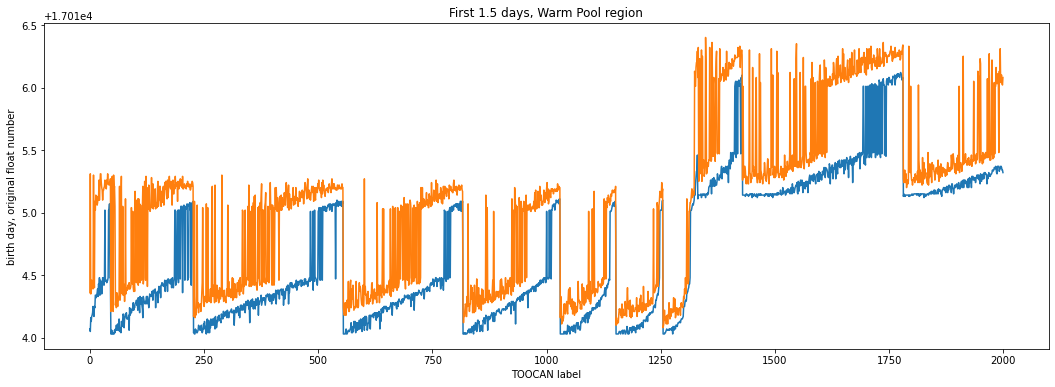

In [37]:
in_times_float = attr_list(toocan, "Utime_Init")
end_times_float = attr_list(toocan, "Utime_End")
N_toocan = len(in_times_float)
N_MCS = 2000
# plt.plot(np.arange(N_toocan),in_times_float)
fig,ax = plt.subplots(figsize=(18,6))
ax.plot(np.arange(N_MCS),in_times_float[:N_MCS])
ax.plot(np.arange(N_MCS),end_times_float[:N_MCS])
ax.set_title('First 1.5 days, Warm Pool region')
ax.set_xlabel('TOOCAN label')
ax.set_ylabel('birth day, original float number')

# Binning Births and Deaths (METHOD 1)

In [38]:
print(Utime_Init_list[0]) # birth time of MCS with index 0 (or label 1)

print(min(Utime_Init_list)) # first time

print(max(Utime_End_list)) # last time

2016-08-01 03:30:00
2016-08-01 00:30:00
2016-09-01 21:30:00


In [39]:
#-- New way of binning

start_time = '2016-08-01 00:00:00'
end_time = '2016-09-01 23:30:00'
binsize = '30T'

time_bins = pd.date_range(start=start_time, end=end_time, freq=binsize)
print(time_bins[0:48])

DatetimeIndex(['2016-08-01 00:00:00', '2016-08-01 00:30:00',
               '2016-08-01 01:00:00', '2016-08-01 01:30:00',
               '2016-08-01 02:00:00', '2016-08-01 02:30:00',
               '2016-08-01 03:00:00', '2016-08-01 03:30:00',
               '2016-08-01 04:00:00', '2016-08-01 04:30:00',
               '2016-08-01 05:00:00', '2016-08-01 05:30:00',
               '2016-08-01 06:00:00', '2016-08-01 06:30:00',
               '2016-08-01 07:00:00', '2016-08-01 07:30:00',
               '2016-08-01 08:00:00', '2016-08-01 08:30:00',
               '2016-08-01 09:00:00', '2016-08-01 09:30:00',
               '2016-08-01 10:00:00', '2016-08-01 10:30:00',
               '2016-08-01 11:00:00', '2016-08-01 11:30:00',
               '2016-08-01 12:00:00', '2016-08-01 12:30:00',
               '2016-08-01 13:00:00', '2016-08-01 13:30:00',
               '2016-08-01 14:00:00', '2016-08-01 14:30:00',
               '2016-08-01 15:00:00', '2016-08-01 15:30:00',
               '2016-08-

In [40]:
from pprint import pprint 

In [41]:


# Testing_times = False
# if Testing_times == True:
#     Utime_Init_list = Utime_Init_list[400:900]
#     Utime_End_list = Utime_End_list[400:900]

# count_per_bin_Init = [0] * len(time_bins)  # count list with zeros
# count_per_bin_End = [0] * len(time_bins)  # count list with zeros

# # iterate over each value in Utime_Init_list
# for In_time in Utime_Init_list:
    
#     # iterate over each bin in time_bins
#     for time_index, time in enumerate(time_bins):
#         # check if the value falls within the current bin
#         if In_time >= time and In_time < time + pd.Timedelta(minutes=30):
#             count_per_bin_Init[time_index] += 1  # +1 for corresponding bin
            

            
# # iterate over each value in Utime_End_list
# for End_time in Utime_End_list:
#     # iterate over each bin in time_bins
#     for time_index, time in enumerate(time_bins):
#         # check if the value falls within the current bin
#         if End_time >= time and End_time < time + pd.Timedelta(minutes=30):
#             count_per_bin_End[time_index] += 1  # +1 for corresponding bin

            
# print(len(time_bins))

# print(sum(count_per_bin_Init))
# print(count_per_bin_Init)


In [42]:
count_per_bin_Init = [0] * len(time_bins)  # count list with zeros
count_per_bin_End = [0] * len(time_bins)  # count list with zeros

# iterate over each value in Utime_Init_list
for In_time in Utime_Init_list:
    # find the index of the first bin that the value falls into
    bin_index = np.where((In_time >= time_bins) & (In_time < time_bins + pd.Timedelta(minutes=30)))[0]
    if bin_index:
        count_per_bin_Init[bin_index[0]] += 1  # increment count
        
# iterate over each value in Utime_Init_list
for End_time in Utime_End_list:
    # find the index of the first bin that the value falls into
    bin_index = np.where((End_time >= time_bins) & (End_time < time_bins + pd.Timedelta(minutes=30)))[0]
    if bin_index:
        count_per_bin_End[bin_index[0]] += 1  # increment count


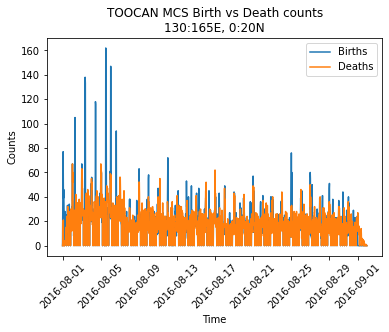

In [43]:
plt.plot(time_bins, count_per_bin_Init, label="Births")
plt.plot(time_bins, count_per_bin_End, label="Deaths")

plt.xlabel("Time")
plt.ylabel("Counts")
plt.xticks(rotation=45)
plt.legend()
plt.title(f"TOOCAN MCS Birth vs Death counts\n{lon_min_subregion}:{lon_max_subregion}E, {lat_min_subregion}:{lat_max_subregion}N")

# Display the plot
plt.show()

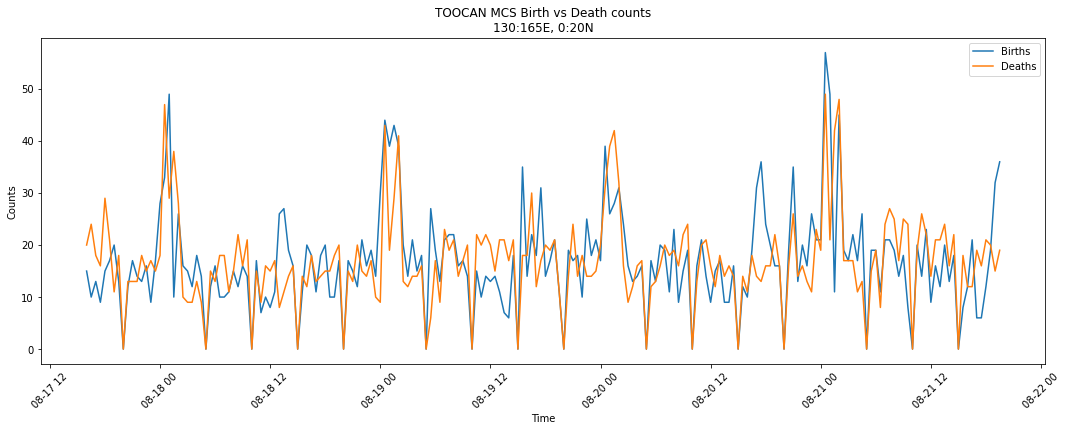

In [44]:
reg_start_idx = 800
reg_end_idx = 1000

fig,ax = plt.subplots(figsize=(18,6))

plt.plot(time_bins[reg_start_idx:reg_end_idx], count_per_bin_Init[reg_start_idx:reg_end_idx], label="Births")
plt.plot(time_bins[reg_start_idx:reg_end_idx], count_per_bin_End[reg_start_idx:reg_end_idx], label="Deaths")

plt.xlabel("Time")
plt.ylabel("Counts")
plt.xticks(rotation=45)
plt.legend()
plt.title(f"TOOCAN MCS Birth vs Death counts\n{lon_min_subregion}:{lon_max_subregion}E, {lat_min_subregion}:{lat_max_subregion}N")

# Display the plot
plt.show()

# Binning Births and Deaths (METHOD 2)

0       2016-08-01 03:30:00
1       2016-08-01 02:30:00
2       2016-08-01 08:00:00
3       2016-08-01 06:30:00
4       2016-08-01 08:30:00
                ...        
29675   2016-08-31 22:30:00
29676   2016-08-31 23:30:00
29677   2016-08-31 23:00:00
29678   2016-08-31 23:30:00
29679   2016-09-01 00:00:00
Length: 29680, dtype: datetime64[ns]


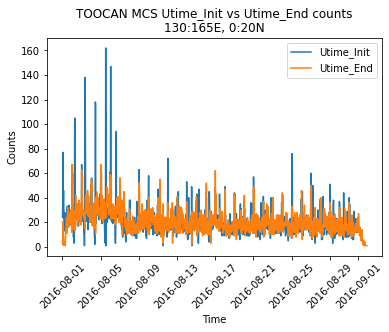

1362
29680
<xarray.DataArray ()>
array(29680)


In [45]:
# convert to a pandas Series
time_series_Init = pd.Series(Utime_Init_list)
time_series_End = pd.Series(Utime_End_list)

# bin size of 1/2 hour
binsize = '30T'

# group the data into bins 
binned_data_series_Init = time_series_Init.groupby(time_series_Init.dt.floor(binsize)).count()
binned_data_series_End = time_series_End.groupby(time_series_End.dt.floor(binsize)).count()

print(time_series_Init.dt.floor(binsize))

# convert to an xarray DataArray
binned_data_Init = xr.DataArray(binned_data_series_Init.values, dims='time', coords={'time': binned_data_series_Init.index})
binned_data_End = xr.DataArray(binned_data_series_End.values, dims='time', coords={'time': binned_data_series_End.index})

# line plot
plt.plot(binned_data_Init.coords['time'], binned_data_Init, label="Utime_Init")
plt.plot(binned_data_End.coords['time'], binned_data_End, label="Utime_End")

plt.xlabel("Time")
plt.ylabel("Counts")
plt.xticks(rotation=45)
plt.legend()
plt.title(f"TOOCAN MCS Utime_Init vs Utime_End counts\n{lon_min_subregion}:{lon_max_subregion}E, {lat_min_subregion}:{lat_max_subregion}N")

# Display the plot
plt.show()
print(len(binned_data_Init))
print(len(Utime_Init_list))
print(sum(binned_data_Init))

# Zooming in to region 1

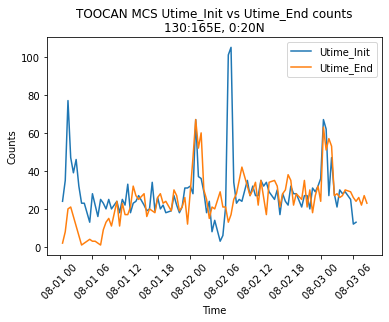

In [46]:
# line plot

reg_start_idx = 0
reg_end_idx = 100

# reg_start_idx = 0
# reg_end_idx = 100

plt.plot(binned_data_Init.coords['time'][reg_start_idx:reg_end_idx], binned_data_Init[reg_start_idx:reg_end_idx], label="Utime_Init")
plt.plot(binned_data_End.coords['time'][reg_start_idx:reg_end_idx], binned_data_End[reg_start_idx:reg_end_idx], label="Utime_End")

plt.xlabel("Time")
plt.ylabel("Counts")
plt.xticks(rotation=45)
plt.legend()
plt.title(f"TOOCAN MCS Utime_Init vs Utime_End counts\n{lon_min_subregion}:{lon_max_subregion}E, {lat_min_subregion}:{lat_max_subregion}N")

# Display the plot
plt.show()



In [47]:
#- Convert the time of range

for i in range(2):
    if i == 0:
        reg_date = binned_data_Init.coords['time'][reg_start_idx]
    else:
        reg_date = binned_data_Init.coords['time'][reg_end_idx]
    timestamp = pd.to_datetime(str(reg_date.values))
    reg_timestep = (timestamp - pd.Timestamp('1970-01-01')) / pd.Timedelta(days=1)
    time_i = ( np.where(df['UTC'] > reg_timestep) )[0][0]
    reg_DYAMOND_timestamp = df['path_dyamond'][time_i][35:45]
    if i == 0:
        reg_DYAMOND_timestamp_begin = reg_DYAMOND_timestamp
    else:
        reg_DYAMOND_timestamp_end = reg_DYAMOND_timestamp


working


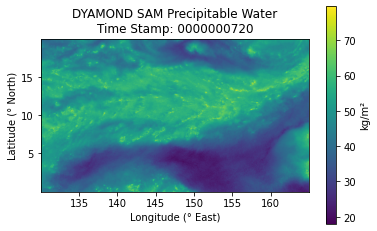

working


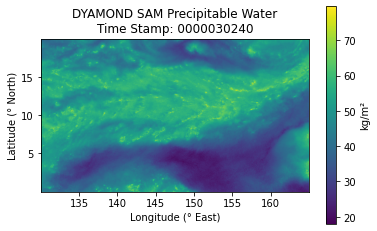

In [48]:
#- Plot

plot_singletime_var("PW", reg_DYAMOND_timestamp_begin)
plot_singletime_var("PW", reg_DYAMOND_timestamp_end)

# Zoom into region 1 further

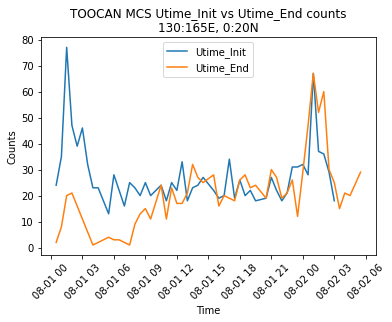

<xarray.DataArray 'time' (time: 50)>
array(['2016-08-01T00:30:00.000000000', '2016-08-01T01:00:00.000000000',
       '2016-08-01T01:30:00.000000000', '2016-08-01T02:00:00.000000000',
       '2016-08-01T02:30:00.000000000', '2016-08-01T03:00:00.000000000',
       '2016-08-01T03:30:00.000000000', '2016-08-01T04:00:00.000000000',
       '2016-08-01T04:30:00.000000000', '2016-08-01T05:30:00.000000000',
       '2016-08-01T06:00:00.000000000', '2016-08-01T06:30:00.000000000',
       '2016-08-01T07:00:00.000000000', '2016-08-01T07:30:00.000000000',
       '2016-08-01T08:00:00.000000000', '2016-08-01T08:30:00.000000000',
       '2016-08-01T09:00:00.000000000', '2016-08-01T09:30:00.000000000',
       '2016-08-01T10:30:00.000000000', '2016-08-01T11:00:00.000000000',
       '2016-08-01T11:30:00.000000000', '2016-08-01T12:00:00.000000000',
       '2016-08-01T12:30:00.000000000', '2016-08-01T13:00:00.000000000',
       '2016-08-01T13:30:00.000000000', '2016-08-01T14:00:00.000000000',
       '2016-0

In [49]:
# line plot
plt.plot(binned_data_Init.coords['time'][0:50], binned_data_Init[0:50], label="Utime_Init")
plt.plot(binned_data_End.coords['time'][0:50], binned_data_End[0:50], label="Utime_End")

plt.xlabel("Time")
plt.ylabel("Counts")
plt.xticks(rotation=45)
plt.legend()
plt.title(f"TOOCAN MCS Utime_Init vs Utime_End counts\n{lon_min_subregion}:{lon_max_subregion}E, {lat_min_subregion}:{lat_max_subregion}N")

# Display the plot
plt.show()
print(binned_data_Init.coords['time'][0:50])

### convolve for births and deaths

In [50]:
num_int_per_day = 24
kernel = np.ones(num_int_per_day) / num_int_per_day

In [51]:
convolved_Init = np.convolve(binned_data_Init, kernel, mode='same')
convolved_End = np.convolve(binned_data_End, kernel, mode='same')

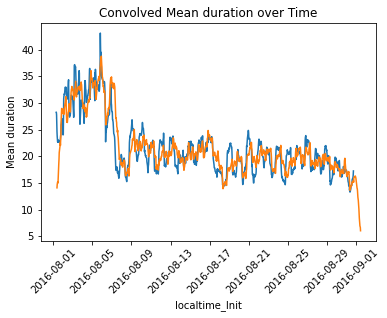

In [52]:
# Create a figure and axes
fig, ax = plt.subplots()

plt.plot((binned_data_Init.coords['time'])[12:-12], convolved_Init[12:-12], label="Utime_Init")
plt.plot((binned_data_End.coords['time'])[12:-12], convolved_End[12:-12], label="Utime_End")

plt.xticks(rotation=45)
ax.set_xlabel('localtime_Init')
plt.ylabel('Mean ' + attribute)
plt.title('Convolved Mean ' + attribute + ' over Time')


plt.show()

### diurnal cycle for births and deaths

<xarray.DataArray 'time' (time: 1362)>
array(['2016-08-01T00:30:00.000000000', '2016-08-01T01:00:00.000000000',
       '2016-08-01T01:30:00.000000000', ..., '2016-08-31T23:00:00.000000000',
       '2016-08-31T23:30:00.000000000', '2016-09-01T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2016-08-01T00:30:00 ... 2016-09-01


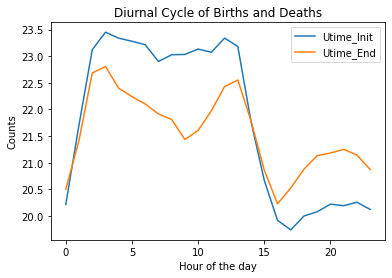

In [53]:
import datetime
# convert to datetime objects
def convert_datetime64_to_datetime(dt64):
    dt = np.datetime_as_string(dt64, unit='s')
    return datetime.datetime.strptime(dt, '%Y-%m-%dT%H:%M:%S')

# convert to hours of the day
hours_Init = [convert_datetime64_to_datetime(dt).hour for dt in binned_data_Init.time.data[12:-12]]
hours_End = [convert_datetime64_to_datetime(dt).hour for dt in binned_data_End.time.data[12:-12]]

print((binned_data_Init.coords['time']))
# average value for each hour of the day
diurnal_hours = range(24)  # 24 hours in a day
diurnal_cycle_Init = []
diurnal_cycle_End = []
for hour in diurnal_hours:
    # make list called values
    # if the hour in the data matches the hour in the current loop, append the data value to values list
    # find the mean for the hour in the current loop (e.g. average of all data in hour 20)
    values_Init = [value_Init for value_Init, h_Init in zip(convolved_Init, hours_Init) if h_Init == hour]
    values_End = [value_End for value_End, h_End in zip(convolved_End, hours_End) if h_End == hour]
    
    average_Init = np.mean(values_Init)
    average_End = np.mean(values_End)
    
    diurnal_cycle_Init.append(average_Init)
    diurnal_cycle_End.append(average_End)

# plot
plt.plot(diurnal_hours, diurnal_cycle_Init, label="Utime_Init")
plt.plot(diurnal_hours, diurnal_cycle_End, label="Utime_End")
plt.xlabel('Hour of the day')
plt.ylabel("Counts")
plt.title("Diurnal Cycle of Births and Deaths")
plt.legend()
plt.show()

### diurnal cycle using np.reshapeprint(diurnal_data.shape)
* this currently ignores the first and last 12 hours of each day to prevent boundary effects
* then, it ignores another 12 hours for Init and 21 hours for End to fit reshaping data


In [54]:
diurnal_hours = range(24)  # 24 hours in a day
for i in range(2):
    if i == 0:
        binned_data = binned_data_Init
        convolved_data = convolved_Init
        label = "Utime_Init"
        
        # data is original-convolved data
        diurnal_data = (binned_data - convolved_data).values[12:-(12+12)]
    else:
        binned_data = binned_data_End
        convolved_data = convolved_End
        label = "Utime_End"
        # data is original-convolved data
        diurnal_data = (binned_data - convolved_data).values[12:-(12+21)]
    

    # axes for reshaping. ndays calculated based on the length of data
    ndays = diurnal_data.shape[0] // 24
    nhours = 24

    diurnal_cycle = np.mean(np.reshape(diurnal_data, (nhours, ndays)), axis=1)

    # plot
    plt.plot(diurnal_hours, diurnal_cycle, label=label)
plt.xlabel('Hour of the day')
plt.ylabel("Counts")
plt.title("Diurnal Cycle of Births and Deaths")
plt.legend()
plt.show()

ValueError: cannot reshape array of size 1326 into shape (24,55)

# Histogram of "duration" and "Utime_End" - "Utime_Init"

In [55]:
death_minus_birth = []
for i in range(len(Utime_Init_list)):
    Utime_Init = Utime_Init_list[i]
    Utime_End = Utime_End_list[i]
    difference = Utime_End - Utime_Init
    death_minus_birth.append(difference)
death_minus_birth_hrs = [td.total_seconds() / 3600 for td in death_minus_birth]

In [56]:
# duration / 2 in order to convert from slot to hours
duration_list_hrs = [( duration / 2 ) for duration in (attr_list(toocan, "duration"))] 

In [57]:
print(min(duration_list_hrs))
print(max(duration_list_hrs))

print(min(death_minus_birth_hrs))
print(max(death_minus_birth_hrs))

binsize_dur = 1
dur_bins = np.array(range(0, 43, binsize_dur))
dur_bins

1.0
19.25
-16.0
42.0


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42])

In [58]:
count_per_bin_duration = [0] * len(dur_bins)  # count list with zeros
count_per_bin_difference = [0] * len(dur_bins)  # count list with zeros

# iterate over each value in duration_list_hrs
for dur in duration_list_hrs:
    # find the index of the first bin that the value falls into
    bin_index = np.where((dur >= dur_bins) & (dur < dur_bins + binsize_dur))[0]
    if bin_index:
        count_per_bin_duration[bin_index[0]] += 1  # increment count
        
# iterate over each value in death_minus_birth_hrs
for diff in death_minus_birth_hrs:
    # find the index of the first bin that the value falls into
    bin_index = np.where((diff >= dur_bins) & (diff < dur_bins + binsize_dur))[0]
    if bin_index:
        count_per_bin_difference[bin_index[0]] += 1  # increment count

<ipython-input-58-43115e89f0a3>:15: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if bin_index:


In [59]:
print(count_per_bin_duration)

[0, 1959, 7036, 7476, 5588, 3432, 1940, 1056, 537, 253, 157, 80, 57, 29, 23, 22, 24, 5, 5, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


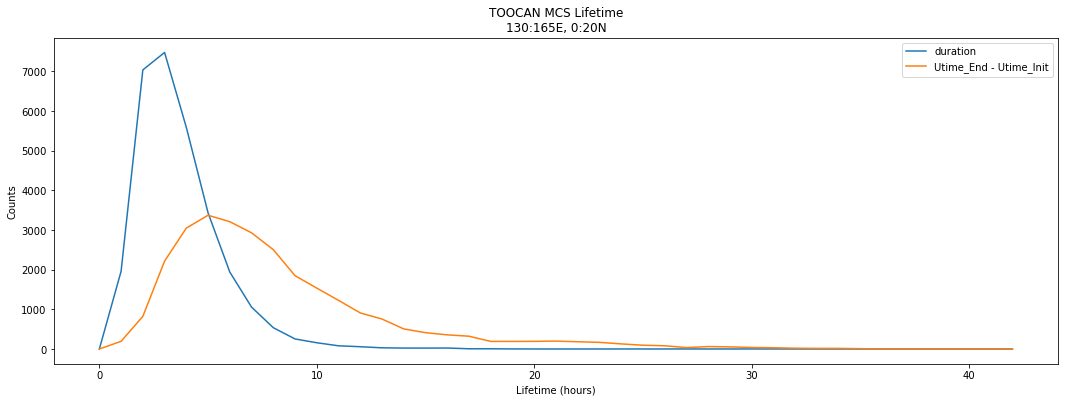

In [60]:
fig,ax = plt.subplots(figsize=(18,6))

plt.plot(dur_bins, count_per_bin_duration, label="duration")
plt.plot(dur_bins, count_per_bin_difference, label="Utime_End - Utime_Init")

plt.xlabel("Lifetime (hours)")
plt.ylabel("Counts")
plt.legend()
plt.title(f"TOOCAN MCS Lifetime\n{lon_min_subregion}:{lon_max_subregion}E, {lat_min_subregion}:{lat_max_subregion}N")

# Display the plot
plt.show()

In [61]:
timestamp = str(toocan[0].Utime_Init)
timestamp.split('.')

['17014', '07']

# Using .clusters.Utime[0] and .clusters.Utime[-1] for birth and death instead
* variables denoted as "first" and "last" and as "new"

In [62]:
Utime_first, Utime_last = [], []
for obj in toocan:
    Utimes = getattr(obj.clusters, "Utime")
    Utime_f = Utimes[0]
    Utime_l = Utimes[-1]
    
    Utime_first.append(Utime_f)
    Utime_last.append(Utime_l)


In [63]:
Utime_first_list = []
for Ufirst_time in Utime_first:
    Ufirst_time = str(Ufirst_time)
    Ufirst_time = Ufirst_time.split('.')
    Ufirst_time_item = data_reference + dt.timedelta(days=int(Ufirst_time[0])) + dt.timedelta(hours=(int(Ufirst_time[1])/2 ))
    Utime_first_list.append(Ufirst_time_item)
                   
Utime_last_list = []
for Ulast_time in Utime_last:
    Ulast_time = str(Ulast_time)
    Ulast_time = Ulast_time.split('.')
    Ulast_time_item = data_reference + dt.timedelta(days=int(Ulast_time[0])) + dt.timedelta(hours=(int(Ulast_time[1])/2 ))
    Utime_last_list.append(Ulast_time_item)


print(Utime_first_list[:10])

[datetime.datetime(2016, 8, 1, 3, 30), datetime.datetime(2016, 8, 1, 2, 30), datetime.datetime(2016, 8, 1, 8, 0), datetime.datetime(2016, 8, 1, 6, 30), datetime.datetime(2016, 8, 1, 8, 30), datetime.datetime(2016, 8, 1, 9, 0), datetime.datetime(2016, 8, 1, 1, 0), datetime.datetime(2016, 8, 1, 12, 30), datetime.datetime(2016, 8, 1, 9, 30), datetime.datetime(2016, 8, 1, 8, 30)]


In [64]:
death_minus_birth_new = []
for i in range(len(Utime_first_list)):
    Utime_first = Utime_first_list[i]
    Utime_last = Utime_last_list[i]
    difference_new = Utime_last - Utime_first
    death_minus_birth_new.append(difference_new)
death_minus_birth_hrs_new = [td.total_seconds() / 3600 for td in death_minus_birth_new]


count_per_bin_difference_new = [0] * len(dur_bins)  # count list with zeros

# iterate over each value in death_minus_birth_hrs
for diff_new in death_minus_birth_hrs_new:
    # find the index of the first bin that the value falls into
    bin_index = np.where((diff_new >= dur_bins) & (diff_new < dur_bins + binsize_dur))[0]
    if bin_index:
        count_per_bin_difference_new[bin_index[0]] += 1  # increment count

<ipython-input-64-a7ae83fe1664>:16: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if bin_index:


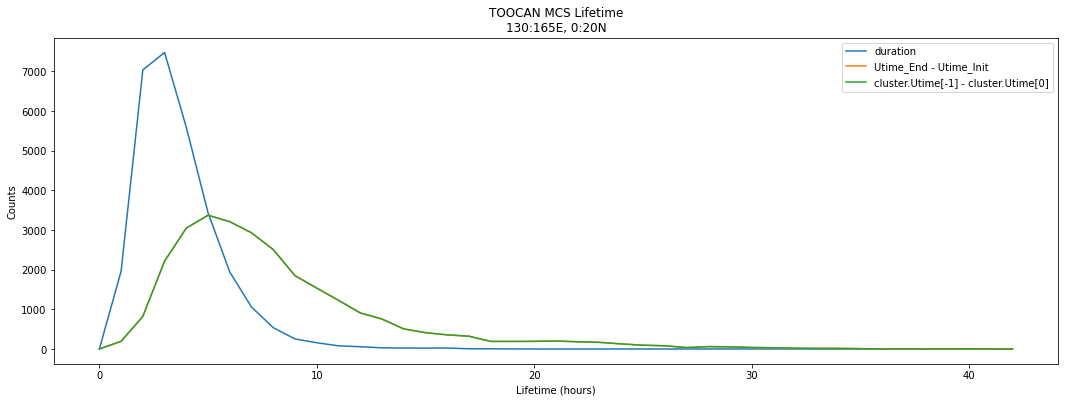

In [65]:
fig,ax = plt.subplots(figsize=(18,6))

plt.plot(dur_bins, count_per_bin_duration, label="duration")
plt.plot(dur_bins, count_per_bin_difference, label="Utime_End - Utime_Init")
plt.plot(dur_bins, count_per_bin_difference_new, label="cluster.Utime[-1] - cluster.Utime[0]")

plt.xlabel("Lifetime (hours)")
plt.ylabel("Counts")
plt.legend()
plt.title(f"TOOCAN MCS Lifetime\n{lon_min_subregion}:{lon_max_subregion}E, {lat_min_subregion}:{lat_max_subregion}N")

# Display the plot
plt.show()

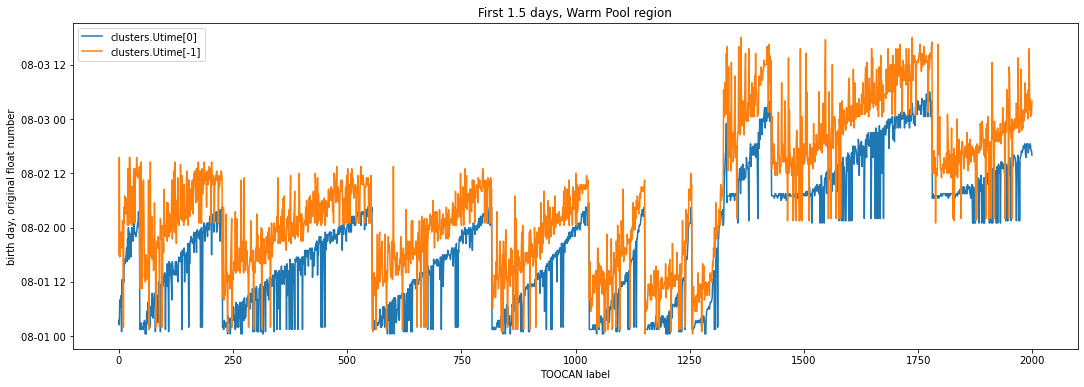

In [66]:
N_toocan = len(Utime_first_list)
N_MCS = 2000

fig,ax = plt.subplots(figsize=(18,6))
ax.plot(np.arange(N_MCS),Utime_first_list[:N_MCS], label="clusters.Utime[0]")
ax.plot(np.arange(N_MCS),Utime_last_list[:N_MCS], label="clusters.Utime[-1]")
ax.set_title('First 1.5 days, Warm Pool region')
ax.set_xlabel('TOOCAN label')
ax.set_ylabel('birth day, original float number')
plt.legend()